# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('C:\\Users\Classic\Documents\GitHub\APMAE4990-\data\hw2data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017
5,1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,...,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129,9.640786
6,0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,...,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802,4.490042
7,0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,...,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986,-0.657482
8,1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,...,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406,0.073541
9,0.309724,-0.737456,-1.536920,-0.562255,-1.599511,0.824390,2.491486,1.011855,-0.281238,0.016707,...,1.260308,0.332623,2.495995,0.334872,0.244085,-1.081475,-1.671211,1.029452,-0.395552,-13.133014


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [16]:
y = df['y']
X = df.drop('y',1)
# 1 is necessary here! axis = 0 or 1 here! confusing....solve it later..

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

C:\Users\Classic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


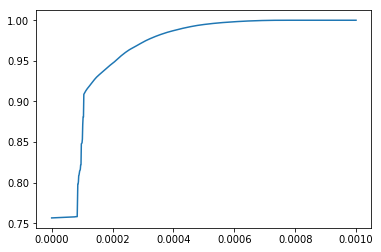

In [29]:
from sklearn.linear_model import Lasso
# Split the data into training/testing sets
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

alphas = np.logspace(-8,-3,1000)
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
# train the model using the training sets
    regr.fit(X_train,y_train)
# make predictions using the testing sets
    y_pred = regr.predict(X)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)    


d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

C:\Users\Classic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


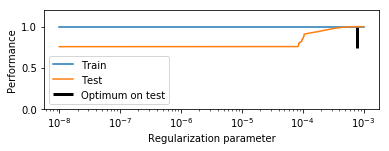

Optimal regularization parameter : 0.000767158117678


In [33]:
plt.subplot(2, 1, 1)

# Fill these in
alphas = np.logspace(-8,-3,1000)
train_errors=[]
test_errors=[]
alpha_optim=0

for alpha in alphas:
    regr = Lasso(alpha=alpha)
# train the model using the training sets
    regr.fit(X_train,y_train)
    train_errors.append(regr.score(X_train,y_train))
    test_errors.append(regr.score(X_test,y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()
print("Optimal regularization parameter : %s" % alpha_optim)

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

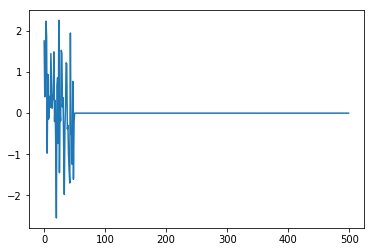

In [34]:
regr = Lasso(alpha=alpha_optim)
regr.fit(X_train,y_train)

plt.plot(regr.coef_)

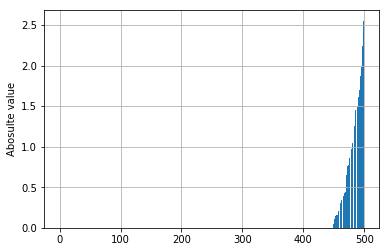

In [37]:
# according to friends: we can scale them as follow:
plt.bar(range(0, len(regr.coef_)), sorted(np.absolute(regr.coef_)))
plt.ylabel("Abosulte value")
plt.grid(True)
plt.show()

The key fact about LASSO regression is that it minimizes sum of squared error, under the constraint that the sum of absolute values of coefficients is less than some constant c. (See here.) So, for all of the coefficients to be zero, there must be no vector of coefficients with summed absolute value less than c that improves error.

Lasso subject to:∑j=1p|βj|<c.
Some of the coefficients may be shrunk exactly to zero.

The least absolute shrinkage and selection operator, or lasso, as described in Tibshirani (1996) is a technique that has received a great deal of interest.

As with ridge regression we assume the covariates are standardized. Lasso estimates of the coefficients (Tibshirani, 1996) achieve minβ(Y−Xβ)′(Y−Xβ)+λ∑pj=1|βj|, so that the L2 penalty of ridge regression ∑pj=1β2j is replaced by an L1 penalty, ∑pj=1|βj|.

Let c0=∑pj=1|β^LS,j| denote the absolute size of the least squares estimates. Values of 0<c<c0 cause shrinkage towards zero.

If, for example, c=c0/2 the average shrinkage of the least squares coefficients is 50%. If λ is sufficiently large, some of the coefficients are driven to zero, leading to a sparse model.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

C:\Users\Classic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


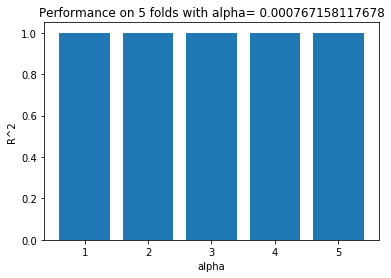

In [42]:
from sklearn.model_selection import cross_val_score

regr = Lasso(alpha=alpha_optim)
scores = cross_val_score(regr, X, y, cv=5)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with alpha= %s' % alpha_optim)
plt.bar(range(1,6),scores)
plt.show()

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [44]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

C:\Users\Classic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

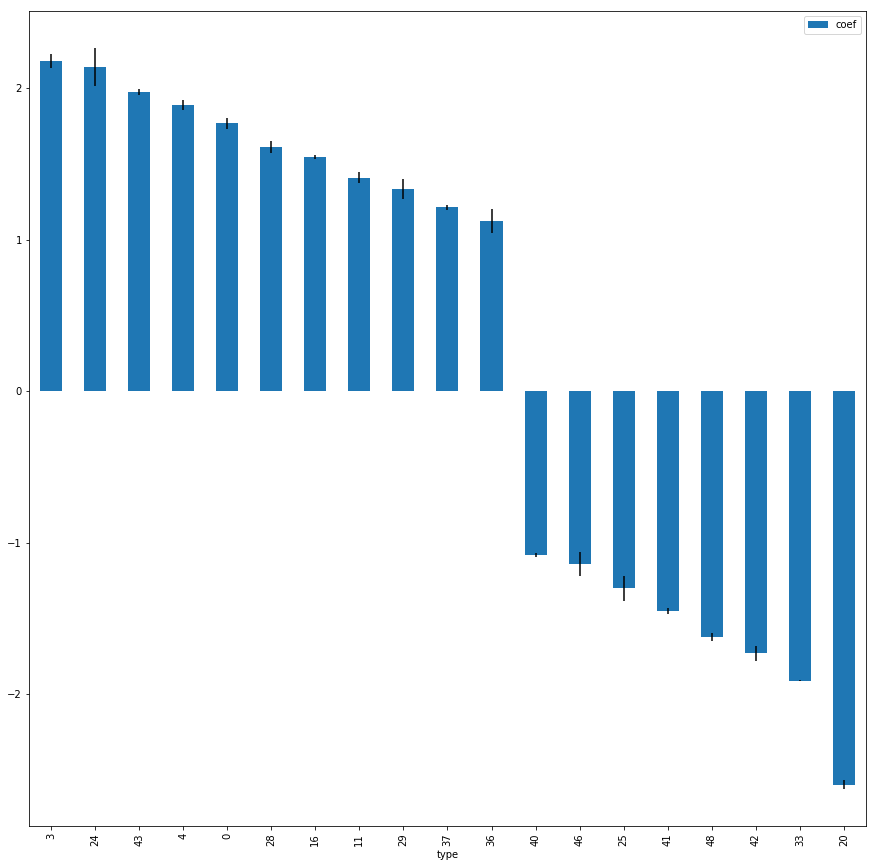

In [49]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))
plt.show()